In [5]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

def CNN_LSTM_pred(filename):
    # Load the dataset
    df = pd.read_csv('data/'+filename+'.csv')

    # Select features to use
    features = ['open', 'high', 'low', 'close', 'pct_chg', 'vol', 'amount', 'pre_close']

    # Preprocessing the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[features])

    def create_dataset(data, look_back=1):
        X, Y = [], []
        for i in range(len(data) - look_back):
            X.append(data[i:(i + look_back), :])
            Y.append(data[i + look_back, 3])  # 'close' price is at index 3
        return np.array(X), np.array(Y)

    # Define look back period
    look_back = 3
    X, Y = create_dataset(scaled_data, look_back)

    # Split into train and test sets
    split_percent = 0.95
    split = int(split_percent * len(X))
    X_train, X_test = X[:split], X[split:]
    Y_train, Y_test = Y[:split], Y[split:]

    # Reshape input to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], len(features)))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], len(features)))

    # Create the CNN-LSTM model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(look_back, len(features))))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Fit the model
    model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, Y_test))

    # Make predictions
    Y_pred = model.predict(X_test)

    # Invert predictions
    # Y_test = scaler.inverse_transform(np.concatenate((np.zeros((len(Y_test), len(features) - 1)), Y_test.reshape(-1, 1)), axis=1))[:,3]
    # Y_pred = scaler.inverse_transform(np.concatenate((np.zeros((len(Y_pred), len(features) - 1)), Y_pred), axis=1))[:,3]


    # Calculate metrics
    MAE = mean_absolute_error(Y_test, Y_pred)
    RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred))
    R2 = r2_score(Y_test, Y_pred)

    print(f'MAE: {MAE}, RMSE: {RMSE}, R-Squared: {R2}')

    # Visualization of predictions vs actual values
    plt.figure(figsize=(14,7))
    plt.plot(Y_test, label='Actual Close Price')
    plt.plot(Y_pred, label='Predicted Close Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.savefig('CNN_LSTM_'+filename+'.png')
    return MAE, RMSE, R2

Epoch 1/10
322/322 [==============================] - 4s 5ms/step - loss: 0.0013 - val_loss: 7.6739e-04
Epoch 2/10
322/322 [==============================] - 1s 3ms/step - loss: 2.5625e-05 - val_loss: 5.5294e-04
Epoch 3/10
322/322 [==============================] - 1s 3ms/step - loss: 2.5204e-05 - val_loss: 7.2233e-04
Epoch 4/10
322/322 [==============================] - 1s 3ms/step - loss: 2.3806e-05 - val_loss: 5.4120e-04
Epoch 5/10
322/322 [==============================] - 1s 3ms/step - loss: 2.8713e-05 - val_loss: 6.3233e-04
Epoch 6/10
322/322 [==============================] - 1s 3ms/step - loss: 2.9538e-05 - val_loss: 9.0842e-04
Epoch 7/10
322/322 [==============================] - 1s 3ms/step - loss: 2.7114e-05 - val_loss: 5.4910e-04
Epoch 8/10
322/322 [==============================] - 1s 3ms/step - loss: 2.6793e-05 - val_loss: 6.4224e-04
Epoch 9/10
322/322 [==============================] - 1s 3ms/step - loss: 2.4886e-05 - val_loss: 0.0010
Epoch 10/10
17/17 [=================

Epoch 10/10
15/15 [==============================] - 1s 1ms/step
MAE: 0.017272991112587746, RMSE: 0.021759440787977622, R-Squared: 0.9529564782985966
Epoch 1/10
186/186 [==============================] - 4s 6ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 2/10
186/186 [==============================] - 1s 3ms/step - loss: 5.1360e-05 - val_loss: 8.0314e-04
Epoch 3/10
186/186 [==============================] - 1s 3ms/step - loss: 4.5653e-05 - val_loss: 0.0022
Epoch 4/10
186/186 [==============================] - 0s 2ms/step - loss: 5.0452e-05 - val_loss: 0.0011
Epoch 5/10
186/186 [==============================] - 1s 3ms/step - loss: 4.6093e-05 - val_loss: 7.7406e-04
Epoch 6/10
186/186 [==============================] - 1s 3ms/step - loss: 4.7770e-05 - val_loss: 8.3295e-04
Epoch 7/10
186/186 [==============================] - 1s 3ms/step - loss: 5.0855e-05 - val_loss: 0.0010
Epoch 8/10
186/186 [==============================] - 1s 3ms/step - loss: 4.4659e-05 - val_loss: 0.0010
Epoch 9/10

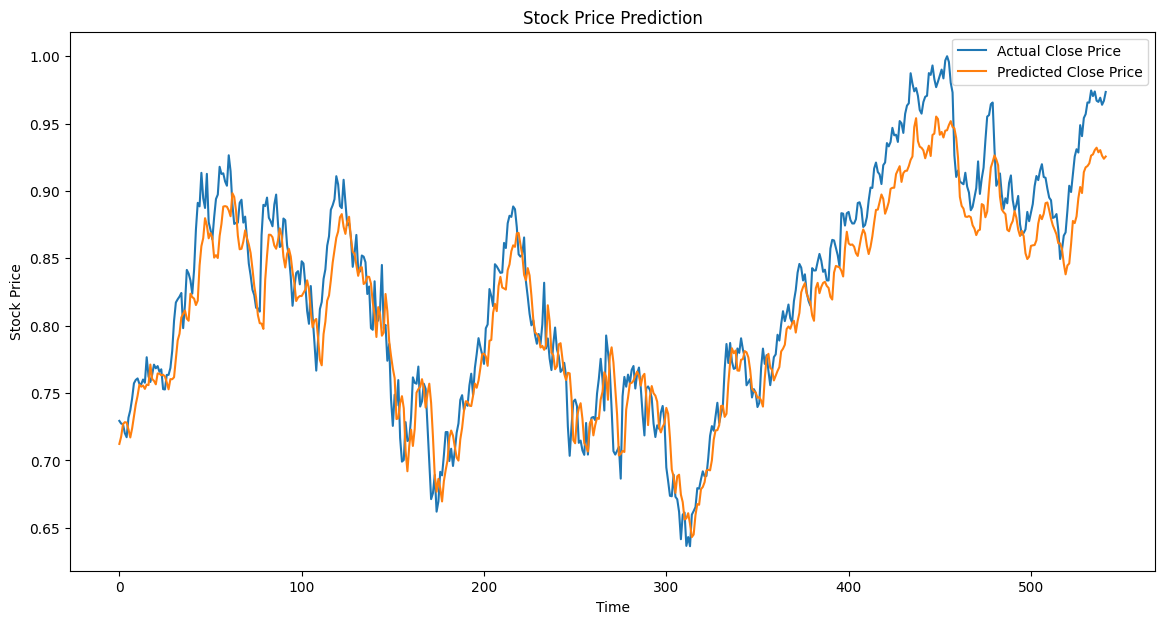

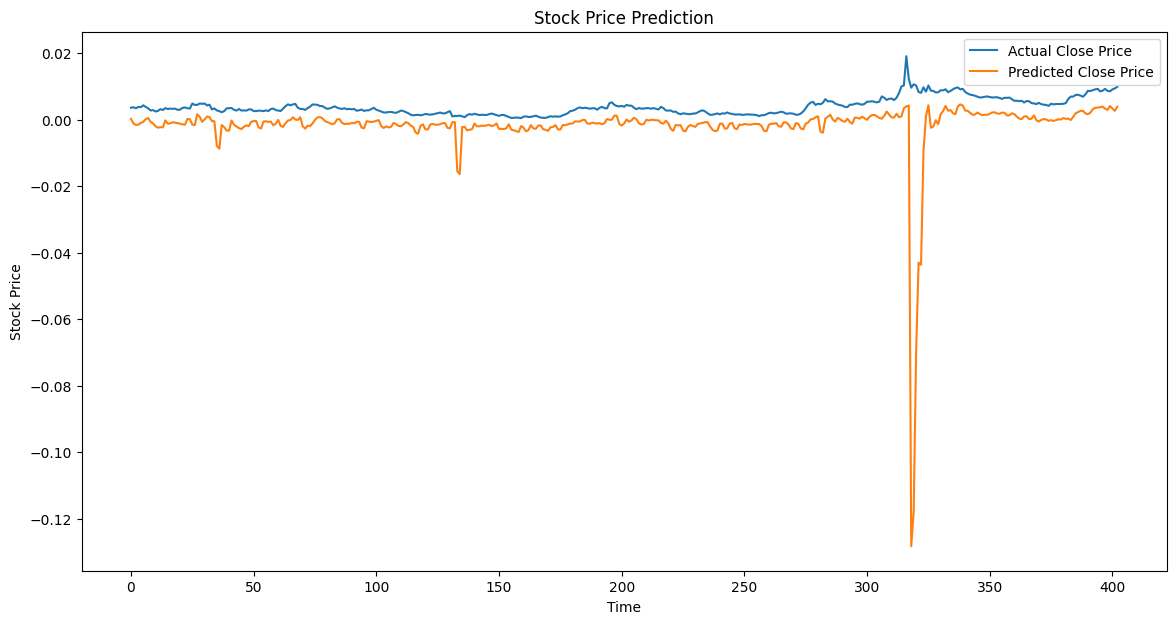

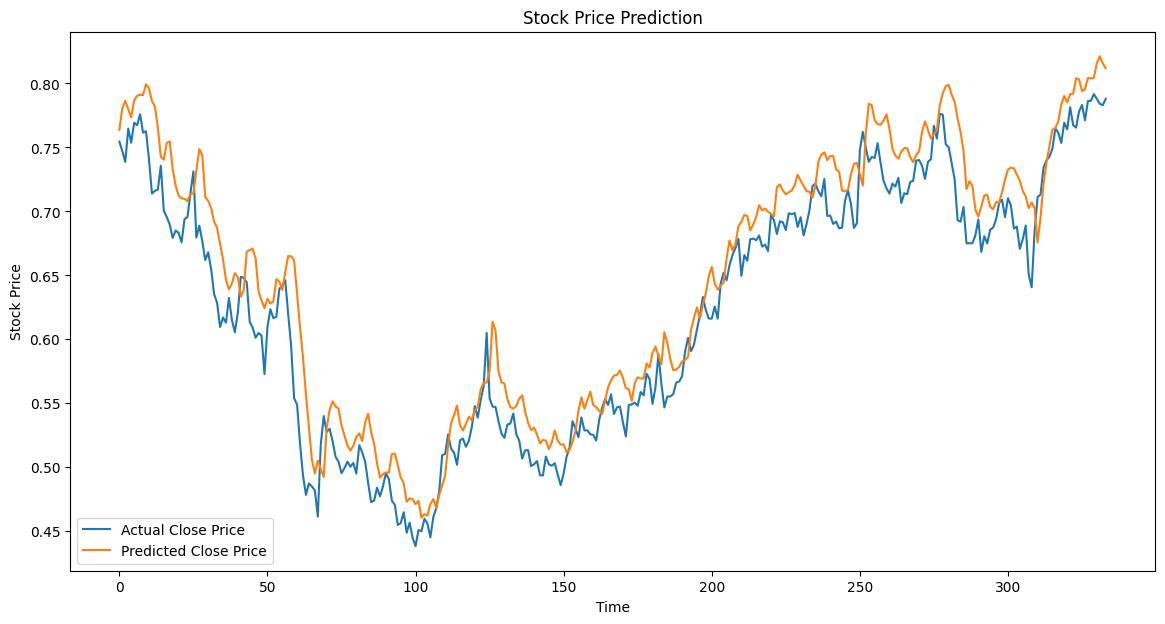

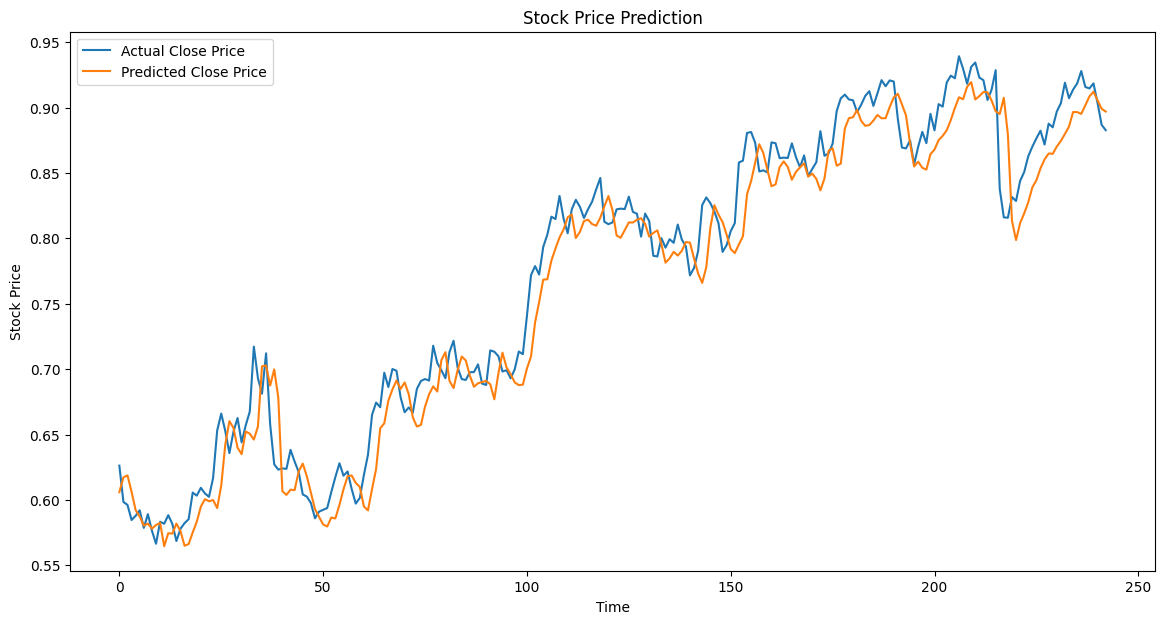

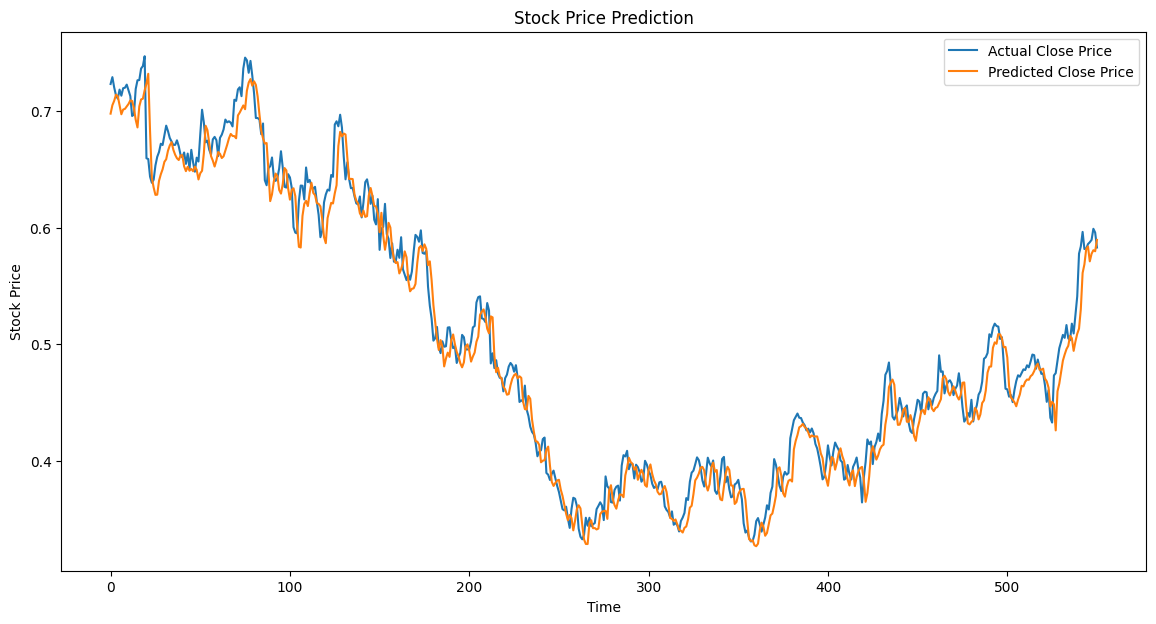

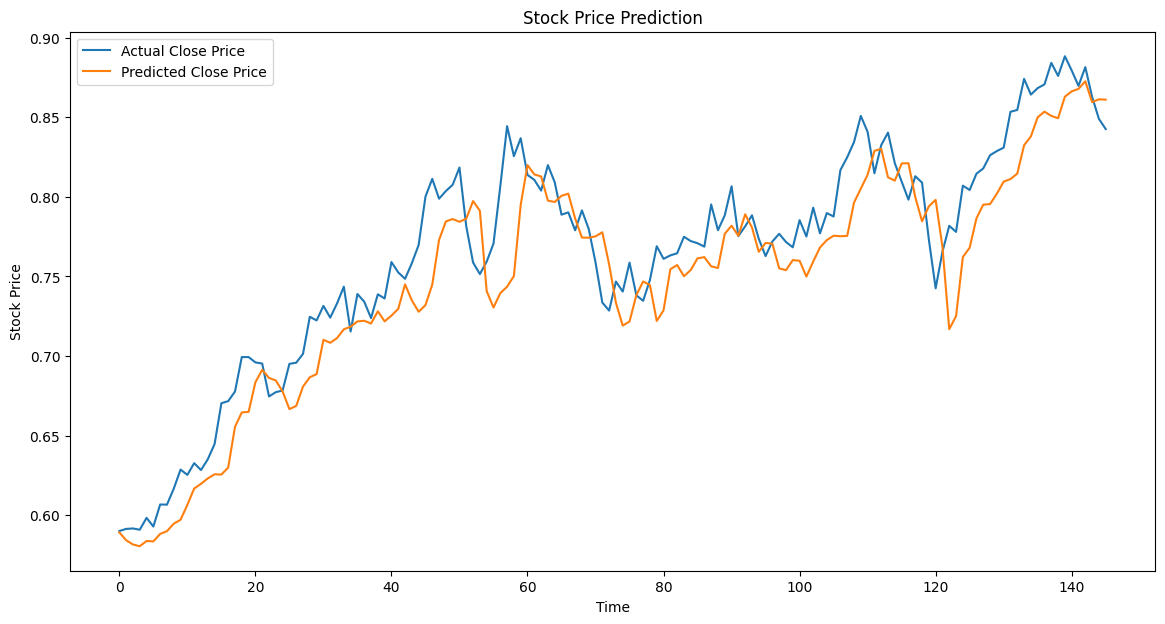

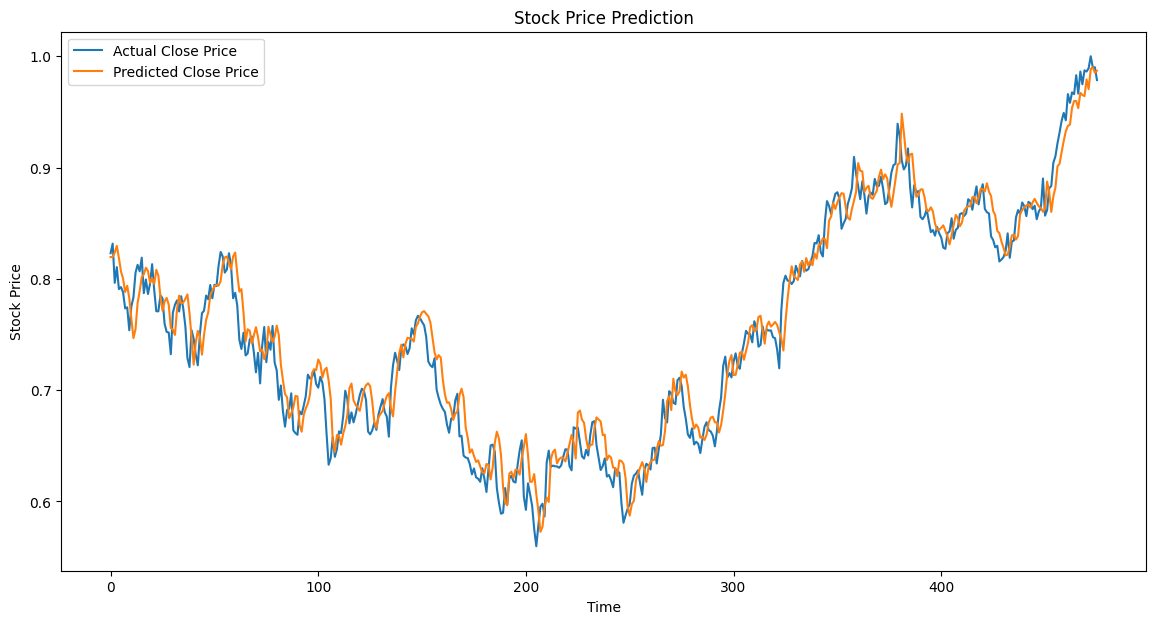

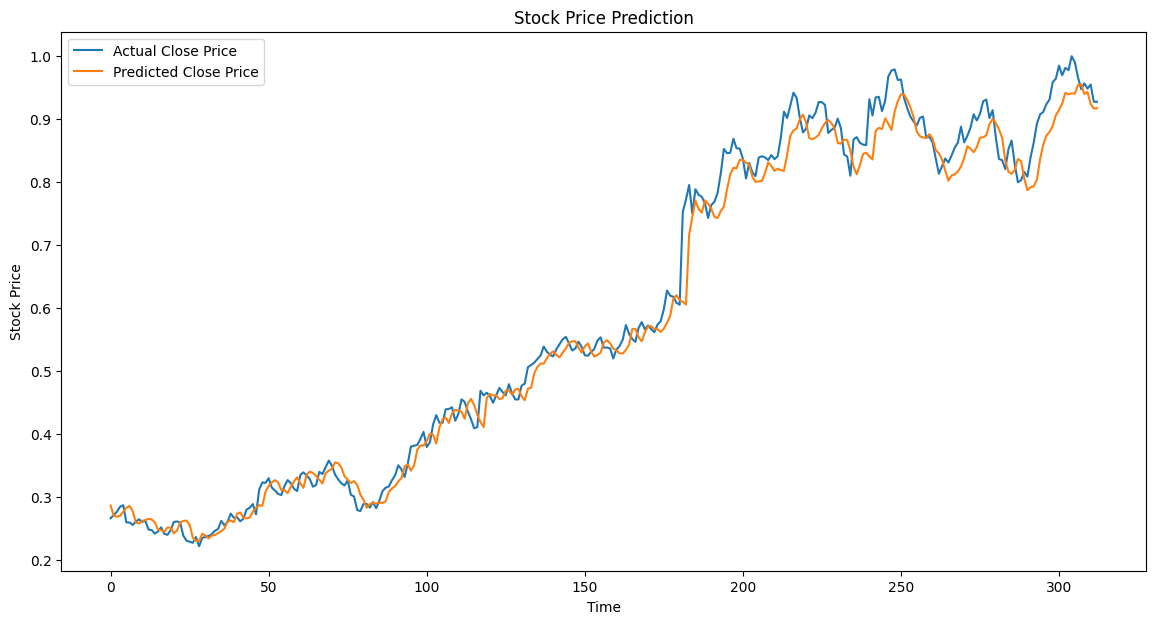

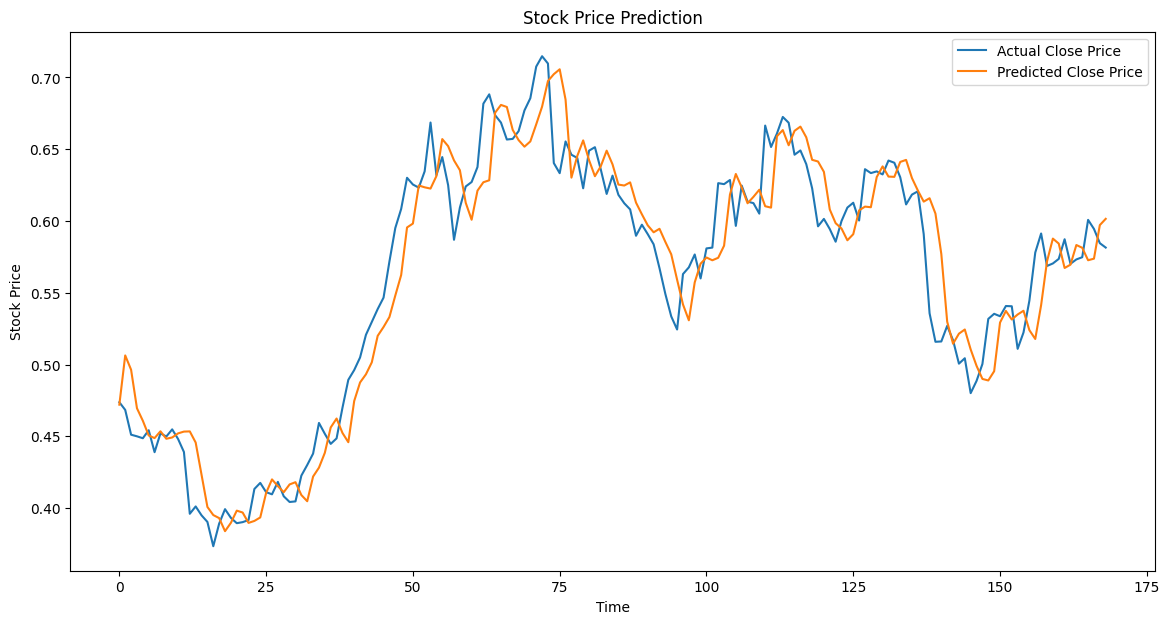

In [8]:
filenames = ['AAPL', 'AMSC', 'AMZN', 'GOOG', 'INTC', 'META', 'MSFT', 'NVDA', 'TSLA', 'TSM']
maes = []
rmses = []
r2s = []
for f in filenames[:]:
    x,y,z = CNN_LSTM_pred(f)
    maes.append(x)
    rmses.append(y)
    r2s.append(z)

In [10]:
print(np.array(maes).mean())
print(np.array(rmses).mean())
print(np.array([max(i,0) for i in r2s if i > 0]).mean())

0.019051458758745747
0.024650968841949412
0.9240784117416992
